In [1]:
# please note this is a modified version of Apache licensed code
# which can be found at https://github.com/katanaml/sample-apps/tree/master/01
# the only changes are adding csv loading instead of tweets, and the use
# of different categories for classification

import GetOldTweets3 as got
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline

2021-07-24 16:40:38.586345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-24 16:40:38.586446: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
classifier = pipeline("zero-shot-classification")

2021-07-24 16:40:43.761396: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-24 16:40:43.761484: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-24 16:40:43.761651: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (chris-Apollo): /proc/driver/nvidia/version does not exist
2021-07-24 16:40:43.762553: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of

In [3]:
# load feedback data

tweets_df = pd.read_csv("text_data.csv")

In [4]:
tweets_df.head(10)

,label,Text
0,Couldn't be improved,Nothing.
1,Environment/ facilities,Temperature in theatre a little low.
2,Access,Same service available at Bingham Health Centre.
3,Communication,Appointment details given over phone - no phys...
4,Communication,On one occasion I was not made aware that my a...
5,Environment/ facilities,The blood pressure monitor and cuff smelt of c...
6,Couldn't be improved,Nothing at present.
7,Access,Long wait for the appointment.
8,Dignity,2 Staff Members I had an issue with in regards...
9,Couldn't be improved,Absolutely nothing


In [5]:
candidate_labels = ["Access", "Dignity", "Environment/ facilities", "Staff", "Communication", "Can't improve"]
candidate_results = [0, 0, 0, 0, 0, 0]

for sent in tqdm(tweets_df['Text'].values):
    # To do multi-class classification, simply pass multi_class=True.
    # In this case, the scores will be independent, but each will fall between 0 and 1.
    res = classifier(sent, candidate_labels)

    if res['labels'][0] == 'Access' and res['scores'][0] > 0.5:
        candidate_results[0] = candidate_results[0] + 1
    if res['labels'][0] == 'Dignity' and res['scores'][0] > 0.5:
        candidate_results[1] = candidate_results[1] + 1
    if res['labels'][0] == 'Environment/ facilities' and res['scores'][0] > 0.5:
        candidate_results[2] = candidate_results[2] + 1
    if res['labels'][0] == 'Staff' and res['scores'][0] > 0.5:
        candidate_results[3] = candidate_results[3] + 1
    if res['labels'][0] == 'Communication' and res['scores'][0] > 0.5:
        candidate_results[4] = candidate_results[4] + 1
    if res['labels'][0] == "Can't improve" and res['scores'][0] > 0.5:
        candidate_results[5] = candidate_results[5] + 1

    if res['scores'][0] > 0.5:
        print(sent)
        print(res['labels'])
        print(res['scores'])
        print('\n')

print(candidate_results)

  1%|          | 1/98 [00:01<01:51,  1.15s/it]

Nothing.
["Can't improve", 'Dignity', 'Staff', 'Access', 'Environment/ facilities', 'Communication']
[0.5985429286956787, 0.12519115209579468, 0.11009147763252258, 0.06910452246665955, 0.04915506765246391, 0.04791483283042908]




  7%|▋         | 7/98 [00:12<02:44,  1.81s/it]

Nothing at present.
["Can't improve", 'Staff', 'Dignity', 'Access', 'Communication', 'Environment/ facilities']
[0.8019675612449646, 0.05546573922038078, 0.04753999039530754, 0.04249494895339012, 0.027815813198685646, 0.024715924635529518]




  9%|▉         | 9/98 [00:15<02:38,  1.78s/it]

2 Staff Members I had an issue with in regards to lack of patience with my capabilities, seeming to be interested in moving onto the next job.
['Staff', "Can't improve", 'Communication', 'Access', 'Dignity', 'Environment/ facilities']
[0.9174590706825256, 0.04418898746371269, 0.017678985372185707, 0.00776316924020648, 0.006863877642899752, 0.006045920308679342]




 10%|█         | 10/98 [00:16<02:21,  1.61s/it]

Absolutely nothing
["Can't improve", 'Dignity', 'Staff', 'Access', 'Communication', 'Environment/ facilities']
[0.5195236802101135, 0.173347607254982, 0.13869856297969818, 0.06576094031333923, 0.05803603678941727, 0.044633109122514725]




 12%|█▏        | 12/98 [00:19<02:09,  1.50s/it]

Nothing
["Can't improve", 'Dignity', 'Staff', 'Access', 'Communication', 'Environment/ facilities']
[0.5970270037651062, 0.13386012613773346, 0.10450192540884018, 0.07033319771289825, 0.051586512476205826, 0.04269115999341011]




 16%|█▋        | 16/98 [00:24<01:42,  1.26s/it]

Reception staff some good some really awful.
['Staff', 'Communication', "Can't improve", 'Access', 'Environment/ facilities', 'Dignity']
[0.6777169108390808, 0.10406730324029922, 0.09845717996358871, 0.06114952638745308, 0.0388188399374485, 0.01979023590683937]




 17%|█▋        | 17/98 [00:25<01:29,  1.10s/it]

Nothing
["Can't improve", 'Dignity', 'Staff', 'Access', 'Communication', 'Environment/ facilities']
[0.5970270037651062, 0.13386012613773346, 0.10450192540884018, 0.07033319771289825, 0.051586512476205826, 0.04269115999341011]




 18%|█▊        | 18/98 [00:25<01:23,  1.05s/it]

Cant think of anything.
["Can't improve", 'Staff', 'Access', 'Dignity', 'Communication', 'Environment/ facilities']
[0.5376144647598267, 0.133013054728508, 0.09120610356330872, 0.08738373965024948, 0.08458466827869415, 0.06619793176651001]




 20%|██        | 20/98 [00:27<01:12,  1.08it/s]

Nothing
["Can't improve", 'Dignity', 'Staff', 'Access', 'Communication', 'Environment/ facilities']
[0.5970270037651062, 0.13386012613773346, 0.10450192540884018, 0.07033319771289825, 0.051586512476205826, 0.04269115999341011]




 23%|██▎       | 23/98 [00:30<01:05,  1.15it/s]

Nothing.
["Can't improve", 'Dignity', 'Staff', 'Access', 'Environment/ facilities', 'Communication']
[0.5985429286956787, 0.12519115209579468, 0.11009147763252258, 0.06910452246665955, 0.04915506765246391, 0.04791483283042908]




 28%|██▊       | 27/98 [00:33<01:00,  1.18it/s]

All good.
['Dignity', 'Access', 'Staff', 'Communication', 'Environment/ facilities', "Can't improve"]
[0.5184673070907593, 0.1530834138393402, 0.15023314952850342, 0.09781039506196976, 0.052996911108493805, 0.02740885317325592]




 39%|███▉      | 38/98 [01:02<01:43,  1.72s/it]

No.
["Can't improve", 'Dignity', 'Staff', 'Communication', 'Access', 'Environment/ facilities']
[0.5263547301292419, 0.15650856494903564, 0.1229536309838295, 0.0731281265616417, 0.0687202662229538, 0.05233471468091011]




 40%|███▉      | 39/98 [01:03<01:28,  1.50s/it]

Communication.
['Communication', 'Staff', 'Access', 'Dignity', "Can't improve", 'Environment/ facilities']
[0.9314451813697815, 0.02120734192430973, 0.020961428061127663, 0.01444248203188181, 0.006450860295444727, 0.005492723546922207]




 41%|████      | 40/98 [01:04<01:25,  1.47s/it]

Food is not up to standard. Stodgy and full of carbs.
["Can't improve", 'Staff', 'Access', 'Dignity', 'Communication', 'Environment/ facilities']
[0.6099324226379395, 0.12361045181751251, 0.09289713203907013, 0.07212437689304352, 0.05886591970920563, 0.04256973788142204]




 55%|█████▌    | 54/98 [01:19<00:51,  1.18s/it]

Nothing better for me. 
["Can't improve", 'Dignity', 'Access', 'Staff', 'Communication', 'Environment/ facilities']
[0.6279764771461487, 0.15107357501983643, 0.07487578690052032, 0.0670650452375412, 0.053326234221458435, 0.025682872161269188]




 58%|█████▊    | 57/98 [01:23<00:48,  1.19s/it]

Nothing
["Can't improve", 'Dignity', 'Staff', 'Access', 'Communication', 'Environment/ facilities']
[0.5970270037651062, 0.13386012613773346, 0.10450192540884018, 0.07033319771289825, 0.051586512476205826, 0.04269115999341011]




 66%|██████▋   | 65/98 [01:31<00:36,  1.10s/it]

Female staff do not be using their mobiles whilst sat on the ward.  They pay more attention to that that us.
['Staff', 'Dignity', 'Access', 'Communication', "Can't improve", 'Environment/ facilities']
[0.5530546307563782, 0.16758878529071808, 0.11636897921562195, 0.0675322636961937, 0.056015048176050186, 0.03944029659032822]




 67%|██████▋   | 66/98 [01:33<00:38,  1.19s/it]

Male members of staff have takeaways daily, this isn't fair as I cannot afford takeaways, they can be very selfish.
['Staff', "Can't improve", 'Access', 'Communication', 'Dignity', 'Environment/ facilities']
[0.6857263445854187, 0.1897238940000534, 0.0429525189101696, 0.039179202169179916, 0.026202382519841194, 0.01621561497449875]




 68%|██████▊   | 67/98 [01:34<00:42,  1.38s/it]

Male members of staff are sometimes explicit in nature, this triggers my PTSD and want to leave. B2`should only have female staff. Staff recruitment spoils what B2 does well.
['Staff', "Can't improve", 'Access', 'Communication', 'Dignity', 'Environment/ facilities']
[0.807500422000885, 0.10207858681678772, 0.0368952676653862, 0.02290525659918785, 0.017162080854177475, 0.013458373956382275]




 71%|███████▏  | 70/98 [01:39<00:41,  1.48s/it]

Staff could spend more time with patients, out of the office. 
Have someone who works here who has the same illness and understands. 
['Staff', 'Communication', 'Access', 'Dignity', "Can't improve", 'Environment/ facilities']
[0.6626054644584656, 0.13984161615371704, 0.08833062648773193, 0.0627453550696373, 0.024111231788992882, 0.022365784272551537]




 72%|███████▏  | 71/98 [01:41<00:46,  1.74s/it]

I'm already in the process of making an official complaint. 
Staff were rude, not friendly nor were they approachable.  They didn't give out medication when they should as they didn't have it for 2 doses. They didn't listen & showed no respect at all.
['Staff', "Can't improve", 'Access', 'Communication', 'Dignity', 'Environment/ facilities']
[0.8979501128196716, 0.04869638755917549, 0.016752418130636215, 0.013866012915968895, 0.012002364732325077, 0.01073276624083519]




 85%|████████▍ | 83/98 [01:58<00:20,  1.36s/it]

I don't think you could do anything better. 
["Can't improve", 'Staff', 'Dignity', 'Access', 'Communication', 'Environment/ facilities']
[0.810684084892273, 0.06670758873224258, 0.05894148349761963, 0.03667338937520981, 0.016075054183602333, 0.010918396525084972]




 87%|████████▋ | 85/98 [02:00<00:15,  1.21s/it]

There is nothing better Chris can do. 
["Can't improve", 'Communication', 'Staff', 'Access', 'Dignity', 'Environment/ facilities']
[0.6200634837150574, 0.10381786525249481, 0.08716760575771332, 0.08148647844791412, 0.07377772778272629, 0.03368685767054558]




 93%|█████████▎| 91/98 [02:06<00:06,  1.14it/s]

Nothing
["Can't improve", 'Dignity', 'Staff', 'Access', 'Communication', 'Environment/ facilities']
[0.5970270037651062, 0.13386012613773346, 0.10450192540884018, 0.07033319771289825, 0.051586512476205826, 0.04269115999341011]




 98%|█████████▊| 96/98 [02:12<00:02,  1.16s/it]

Psychiatrist doesn't care about helping me get through this time in my life, doesn't understand me and communication is poor
['Communication', 'Staff', "Can't improve", 'Access', 'Dignity', 'Environment/ facilities']
[0.553819477558136, 0.173935666680336, 0.11046619713306427, 0.0911044180393219, 0.045560795813798904, 0.02511340193450451]




100%|██████████| 98/98 [02:15<00:00,  1.38s/it]

Communicate properly on how long the waiting list is to start MBT.
Regular 1-2-1's when waiting for MBT, note very 3 months.
Manage volatile situations in group session better. 
Get more of a gender balance in group sessions.
['Communication', 'Staff', 'Access', 'Dignity', "Can't improve", 'Environment/ facilities']
[0.6167604923248291, 0.11226692795753479, 0.10439528524875641, 0.09508894383907318, 0.03779516741633415, 0.03369314223527908]


[0, 1, 0, 7, 3, 15]


In [6]:
data = {'labels': candidate_labels,
        'values': candidate_results}

df_chart = pd.DataFrame(data, columns=['labels','values'])

df_chart.head()

,labels,values
0,Access,0
1,Dignity,1
2,Environment/ facilities,0
3,Staff,7
4,Communication,3


<AxesSubplot:xlabel='labels', ylabel='values'>

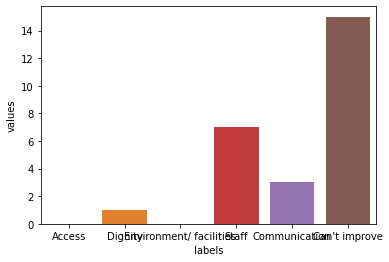

In [7]:
sns.barplot(data = df_chart
            ,x = 'labels'
            ,y = 'values'
            )